![](../images/rivacon_frontmark_combined_header.png)

# Introduction to European Plain Vanilla Options

In [1]:
import datetime as dt
import math
import matplotlib.pyplot as plt
from scipy.stats import norm
import random
import pandas as pd

%load_ext autoreload
%autoreload 2
#the next line is a jupyter internal command to show the matplotlib graphs within the notebook
%matplotlib inline

## Definition of an European Plain Vanilla Option

An European option gives the holder the right to *buy* (call option) or to *sell* (put option) the underlying asset at a certain date for a certain price. The price is called *exercise price* or *strike price*; the date is called *expiration date* or *maturity*. Let $c$ denote an European call option and $p$ and European put option. The payoff at maturity of an European option is given as

$$c = max(S_0-K,0) \quad \text{resp.} \quad p = max(K-S_0, 0)$$

where $S_0$ is the current spot price of the underlying and $K$ is the strike price.


## Option Pricing Using Black-Scholes-Merton Model

### Black-Scholes-Merton pricing formulas

The value of an European option according to the Black-Scholes-Merton formulas is

$$c=S_0N(d_1)-Ke^{-rT}N(d_2) \quad \text{resp.} \quad p=Ke^{-rT}N(d_2)-S_0N(-d_1)$$

with $$d_1=\frac{\ln(S_0/K)+(r+\frac{\sigma^2}{2})T}{\sigma\sqrt{T}} \quad \text{and} \quad d_2 = \frac{\ln(S_0/K)+(r-\frac{\sigma^2}{2})T}{\sigma\sqrt{T}}= d_1-\sigma\sqrt{T}.$$

$N(x)$ is the cumulative probability distribution function for a standardized normal distribution, $r$ is the risk-free interest rate, $\sigma$ is the underlying's volatility and $T$ is the option's maturity as year fraction.

In contrast to European options, American options who represent the majority of traded options, can be exercised any time up to the expiration date.

The following code defines the Black-Scholes-Merton formula for European options. 

In [2]:
def BSMOptionPricer(Type,S0, K, r, sigma, T, t=0):
    d1= (math.log(S0/K)+(r+sigma**2/2)*(T-t))/(sigma*math.sqrt(T-t))
    d2 = d1-sigma*math.sqrt(T-t)
    if Type=='c':
        cp = 1
    if Type =='p':
        cp = -1
    return cp*(S0*norm.cdf(cp*d1)-K*math.exp(-r*(T-t))*norm.cdf(cp*d2))

### Calculation of an option price using Black-Scholes-Merton formulas

The following code defines the input parameters for the BSM formula and computes the price of a call option as well as a put option. Therefore, it calls the formula which was defined in the previous step.

In [3]:
# Definition of the input parameters
S0 = 50 # Current spot price
K = 50 # Strike price
r = 0.05 # Risk-free interest rate
sigma = 0.3 # Volatility of the underlying
t = 0.0 # Time to valuation date
T = 1.0 # Time to maturity

# Calculation of the call price
c = BSMOptionPricer('c', S0, K, r, sigma, T, t)
print('Call price = ', c)

#Calculation of the put price
p = BSMOptionPricer('p', S0, K, r, sigma, T, t)
print('Put price = ', p)

Call price =  7.115627392992909
Put price =  4.677098618028616


### Plotting the option price using Black-Scholes-Merton

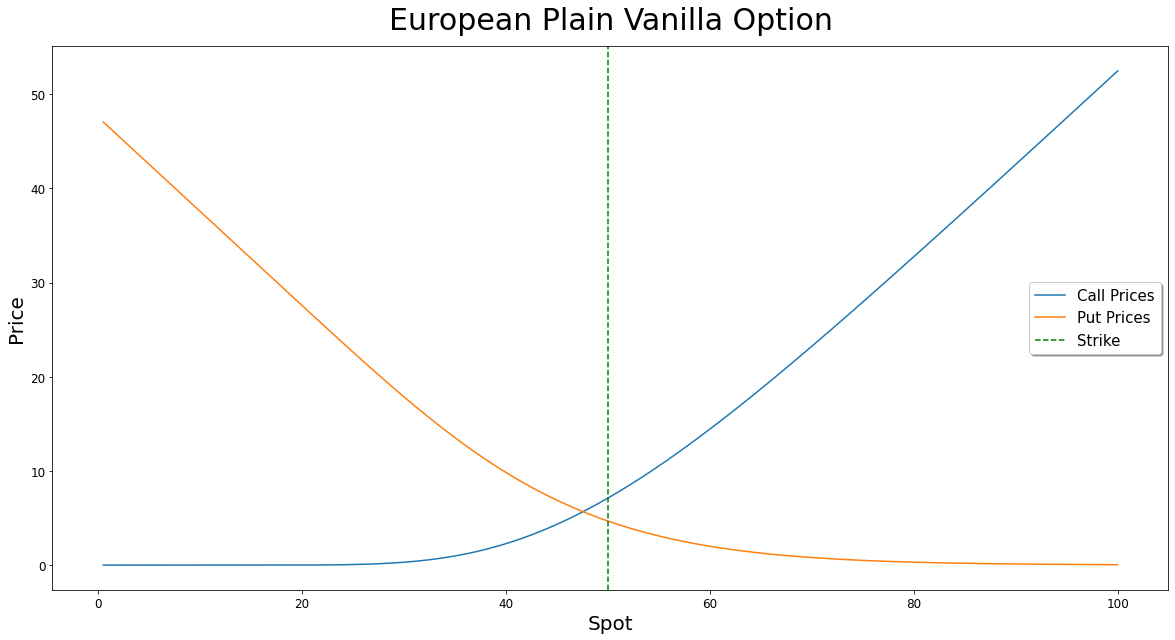

In [4]:
spots = []
n=0.5
while n<=100:
    spots.append(n)
    n=n+0.1
    
#strikes = [0,10,20,30,40,50,60,70,80,90,100]
#ttm = [0.1, 0.25, 0.5, 0.75, 1.0, 1.5, 2.0, 2.5, 3.0, 4.0, 5.0]
#vols = [0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5]
    
call_prices = []
for i in range(len(spots)):
    call_prices.append(BSMOptionPricer('c', spots[i], K, r, sigma, T, t))
    
put_prices = []
for i in range(len(spots)):
    put_prices.append(BSMOptionPricer('p', spots[i], K, r, sigma, T, t))

# create data frame
prices_list = {'Spots': spots, 
              'Call Prices': call_prices,
              'Put Prices': put_prices}

prices = pd.DataFrame(prices_list, index = spots)    

# plot the prices
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(prices['Spots'],prices['Call Prices'],label='Call Prices')
ax.plot(prices['Spots'],prices['Put Prices'],label = 'Put Prices')
ax.tick_params(axis="x", labelsize=12)
ax.tick_params(axis="y", labelsize=12)
ax.axvline(x=K, label='Strike', ls= '--', c='g')
ax.set_title('European Plain Vanilla Option',fontsize=30,y=1.02)
ax.set_xlabel('Spot',fontsize=20)
ax.set_ylabel('Price',fontsize=20)
legend = ax.legend(loc='best', shadow=True, fontsize='15')

### Exercises – Black-Scholes-Merton model

- Calculate the price of a European call option in 0.5 years with a spot price of 40, a strike of 60, a risk-free-interest rate of 5%, a volatility of 0.25 and maturity in 1.5 years.

- Plot a graph of the price of the European call option you just calculated dependent on different volatilities.

## Option Pricing Using Black-76 Model

### Black-76 pricing formulas

In the Black-76 model (Black, "The pricing of commodity contracts", 1976), the spot price of the underlying is replaced by a discounted forward price. This is because we are interested rather in the payoff at maturity where the spot price $S_T$ should correspond to the current forward price $F_0$. We will apply this model later using the pyvacon European Vanilla Specification. The payoff at maturity of an European call option $c$ or put option $p$ is given as

$$c = max(F_0-K,0) \quad \text{resp.} \quad p = max(K-F_0, 0)$$

where $F_0$ is the current forward price of the underlying and $K$ is the strike price.

The value of an European option using the Black-76 model is:

$$c=e^{-rT}[F_0N(d_1)-KN(d_2)] \quad \text{resp.} \quad p=e^{-rT}[KN(-d_2)-F_0N(-d_1)]$$

with $$d_1=\frac{\ln(F_0/K)+(\frac{\sigma^2}{2})T}{\sigma\sqrt{T}} \quad \text{and} \quad d_2 = \frac{\ln(F_0/K)+(\frac{\sigma^2}{2})T}{\sigma\sqrt{T}}= d_1-\sigma\sqrt{T}.$$

$N(x)$ is the cumulative probability distribution function for a standardized normal distribution, $r$ is the discount rate, $\sigma$ is the underlying's volatility and $T$ is the option's maturity as year fraction.

The following code defines the Black-76 formula for European options. 

In [5]:
def B76OptionPricer(Type,F, K, r_dsc, sigma, T, t=0):
    d1 = (math.log(F/K)+(sigma**2/2)*(T-t))/(sigma*math.sqrt(T-t))
    d2 = d1-sigma*math.sqrt(T-t)
    if Type=='c':
        cp = 1
    if Type =='p':
        cp = -1
    return cp*math.exp(-r_dsc*(T-t))*(F*norm.cdf(cp*d1)-K*norm.cdf(cp*d2))

### Calculation of an option price using Black-76 formulas

The following code defines the input parameters for the Black-76 formula and computes the price of a call option as well as a put option. Therefore, it calls the formula which was defined in the previous step. For the calculation of the forward value, we assume a funding rate which is different from the discount rate minus the borrowing rate.

In [6]:
# Definition of the input parameters
S0 = 90 # Current spot price
K = 50 # Strike price
r_dsc = 0.0 # Discount rate
r_f = 0.0 # Funding rate
r_b = 0.00 # Borrowing rate
sigma = 0.2 # Volatility of the underlying
t = 0.0 # Time to valuation date
T = 1.0 # Time to maturity
F0 = S0*math.exp((r_f-r_b)*(T-t)) # Forward value is calculated assuming a funding-rate different from the discount rate minus the borrowing rate

# Calculation of the call price
c = B76OptionPricer('c', F0, K, r_dsc, sigma, T, t)
print('Call price = ', c)

#Calculation of the put price
p = B76OptionPricer('p', F0, K, r_dsc, sigma, T, t)
print('Put price = ', p)

Call price =  40.006323707962906
Put price =  0.006323707962900452


## Plotting the Option Price Using the Black-76 Model

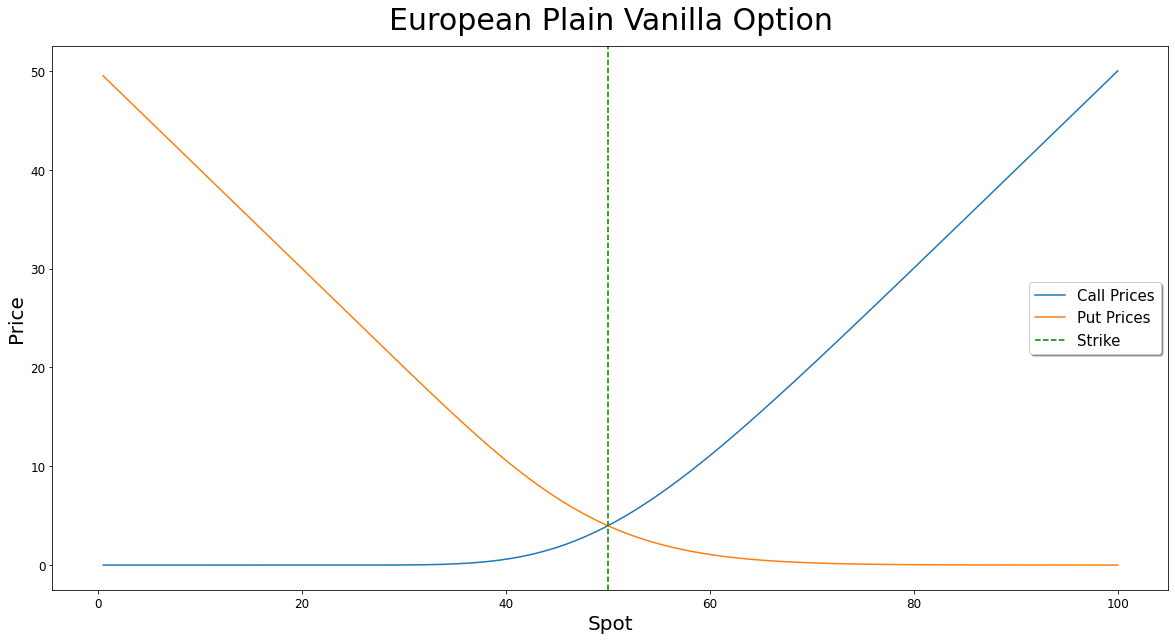

In [7]:
fwd_spots = []
#strikes = [0,10,20,30,40,50,60,70,80,90,100]
#ttm = [0.1, 0.25, 0.5, 0.75, 1.0, 1.5, 2.0, 2.5, 3.0, 4.0, 5.0]
#vols = [0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5]

n=0.5
while n<=100:
    fwd_spots.append(n)
    n=n+0.1
    
call_prices = []
for i in range(len(fwd_spots)):
    call_prices.append(B76OptionPricer('c', fwd_spots[i], K, r_dsc, sigma, T, t))
    
put_prices = []
for i in range(len(fwd_spots)):
    put_prices.append(B76OptionPricer('p', fwd_spots[i], K, r_dsc, sigma, T, t))

# create data frame
prices_list = {'Spots': fwd_spots, 
              'Call Prices': call_prices,
              'Put Prices': put_prices}

prices = pd.DataFrame(prices_list, index = fwd_spots)    

# plot the prices
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(prices['Spots'],prices['Call Prices'],label='Call Prices')
ax.plot(prices['Spots'],prices['Put Prices'],label = 'Put Prices')
ax.tick_params(axis="x", labelsize=12)
ax.tick_params(axis="y", labelsize=12)
ax.axvline(x=K, label='Strike', ls= '--', c='g')
ax.set_title('European Plain Vanilla Option',fontsize=30,y=1.02)
ax.set_xlabel('Spot',fontsize=20)
ax.set_ylabel('Price',fontsize=20)
legend = ax.legend(loc='best', shadow=True, fontsize='15')

### Converting the Black-Scholes-Merton model into a Black-76 model

Modifying the Black-Scholes-Merton model from above, we derive the same results as using the Black-76 model. Distinguishing between the funding rate $r_f$ and borrowing rate $r_b$ used to so calculate the forward value and the discount rate $r_{dsc}$, the modified function looks as follows:

$$c=S_0e^{((r_f-r_b)-r_{dsc})T}N(d_1)-Ke^{-r_{dsc}T}N(d_2) \quad \text{resp.} \quad p=Ke^{-r_{dsc}T}N(d_2)-S_0e^{((r_f-r_b)-r_{dsc})T}N(-d_1)$$

with $$d_1=\frac{\ln(S_0/K)+((r_f-r_b)+\frac{\sigma^2}{2})T}{\sigma\sqrt{T}} \quad \text{and} \quad d_2 = \frac{\ln(S_0/K)+((r_f-r_b)-\frac{\sigma^2}{2})T}{\sigma\sqrt{T}}= d_1-\sigma\sqrt{T}.$$

The function is provided in the following code.

In [8]:
def BSMOptionPricerMod(Type,S0, K, r_f, r_dsc, sigma, T, t=0):
    d1= (math.log(S0/K)+(r_f-r_b+sigma**2/2)*(T-t))/(sigma*math.sqrt(T-t))
    d2 = d1-sigma*math.sqrt(T-t)
    if Type=='c':
        cp = 1
    if Type =='p':
        cp = -1
    return cp*(S0*math.exp((r_f-r_b-r_dsc)*(T-t))*norm.cdf(cp*d1)-K*math.exp(-r_dsc*(T-t))*norm.cdf(cp*d2))

In [9]:
#Calculation of the call price
c = BSMOptionPricerMod('c', S0, K, r_f,r_dsc, sigma, T, t)
print('Call price = ', c)

#Calculation of the put price
p = BSMOptionPricerMod('p', S0, K, r_f,r_dsc, sigma, T, t)
print('Put price = ', p)

Call price =  40.006323707962906
Put price =  0.006323707962900452


### Exercise - Black-76 model

- Sketch a diagram showing the price of an European call/put option trading at the money dependent on the time to maturity.

- Sketch a diagram showing the price of an European call/put option trading at the money dependent on different discount factors.

## Option Pricing Using Monte Carlo Simulation

### Monte Carlo option pricing formulas

As a first step, we need to simulate the path followed by the stock price $S$. Following one single path, the stock price at maturity $S_T$ is given by 

$$S_T = S_0e^{{(\hat{\mu}-\frac{\sigma^2}{2})T+\sigma\epsilon\sqrt{T}}}$$

with $S_0$ as the current stock price, $\hat{\mu}$ as the expected return in a risk-neutral world, $\sigma$ as the underlying's volatility, $t$ as the time to maturity as year fraction and $\epsilon$ as a random sample from a normal distribution with mean zero and standard deviation 1. Here, we assume that the expected return $\hat{\mu}$ to be the funding rate $r_f$ minus the borrowing rate $r_b$.

For each simulated path, the payoff is defined as before as

$$c = max(S_T-K,0) \quad \text{resp.} \quad p = max(K-S_T, 0).$$

The option price can now be calculated by simulating $n$ different paths and averaging the discounted payoffs of all paths.

For a detailed description please refer to Hull, *Options, futures, and other derivatives, 8th Edition,* 2012, p. 446 ff.

The following code defines an option pricing formula using Monte Carlo simulation.

In [10]:
def MCS(Type, S0, K, r_f, r_b, r_dsc, sigma, T,n, t=0):
    sumPV = 0
    if Type=='c':
         cp = 1
    if Type =='p':
        cp = -1  
    for i in range(n):
        St = S0*math.exp((r_f-r_b-sigma**2/2)*(T-t)+sigma*norm.ppf(random.random())*math.sqrt(T-t)) # Calculates stock price at maturity for a single path
        PV = max(cp*(St-K),0)*math.exp(-r_dsc*(T-t)) # Calculates the present value of the payoff of a single path
        sumPV = sumPV + PV # Sums up the present values of the single paths over the number of simulations                               
    return sumPV/n # calculates the average present value of the n paths

### Calculation of an option price using Monte Carlo simulation

The following code defines the input parameters for the Monte Carlo simulation and computes the price of a call option as well as a put option. Therefore, it calls the formula which was defined in the previous step.

In [11]:
S0 = 50 # Current stock price
K = 50 # Strike price
r_f = 0.05 # Funding rate
r_b = 0.00 # Borrowing rate
r_dsc = 0.05 # Disount rate
sigma = 0.3 # Volatility of the underlying
t = 0.0 # Time to valuation date
T = 1.0 # Time to maturity
n = 100000 # Number of simulated paths for the stock price at maturity

tic = dt.datetime.now()
c = MCS('c',S0, K, r_f, r_b, r_dsc, sigma, T,n, t)
print ("Call price = ",c)
print('Runtime call price:  {}'.format(dt.datetime.now() - tic))
p = MCS('p',S0, K, r_f,r_b, r_dsc, sigma, T,n, t)
print("Put price = ",p)
print('Runtime put price: {}'.format(dt.datetime.now() - tic))

Call price =  7.115902427193279
Runtime call price:  0:00:32.328269
Put price =  4.6942024594154335
Runtime put price: 0:01:03.003356


### Exercise - Monte Carlo Simulation

- Change the simulated number of paths to see how the price converges to the price calculated using the analytic function (of course using the same parameter as above).

## General Remarks

### Implied volatility

Since the volatility in the option pricing formulas cannot be directly observed, one usually works with implied volatilities. Implied volatilities are the volatilities implied by option prices observed in the market. As it is not possible to invert the Black-Scholes-Merton or Black-76 formulas so that the volatility is expressed as a function of the other parameters, one needs to use an interactive search procedure.

### Dividends

Up to now, we assumed that the option's underlying is a non dividend paying stock. Including cash-dividends in the Black-Scholes-Merton model, one basically needs to adjust the stock price by the present value of the dividends to be paid during the lift of the option.

---